# Library imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torchvision
import scipy
from scipy.signal import convolve2d
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', grid=False)

# Load in images

## MNIST

In [2]:
data = torchvision.datasets.MNIST(
        train=False, download=True, root='./data',
        transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    )

data = [_[0][0] for _ in data]

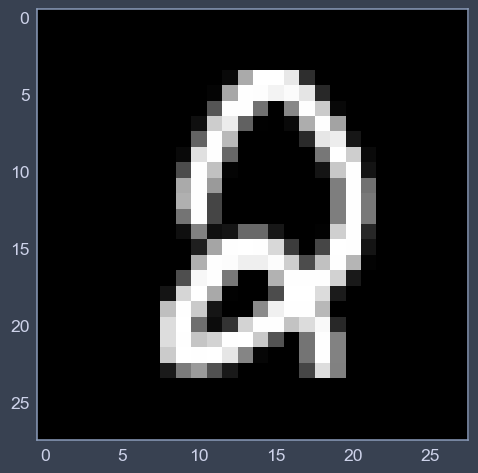

In [18]:
idx = 926
plt.imshow(data[idx]*255, cmap='gray')

In [4]:
mnist_stim = np.round(data[idx].numpy()*255).astype(int)

## Random noise

In [5]:
np.random.seed(26)
stim = np.round(np.random.rand(28,28)*255).astype(int)

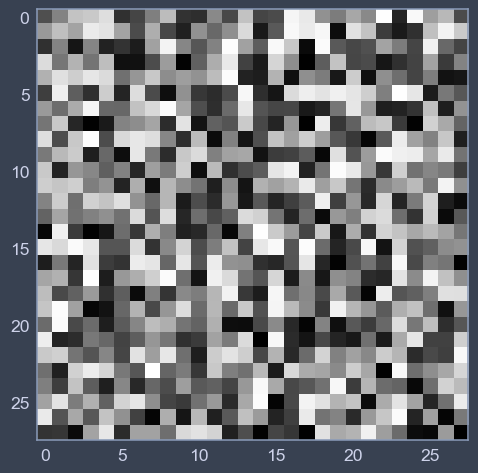

In [6]:
plt.imshow(stim, cmap='gray')

# Generate stimulus .txt

In [7]:
def txt_gen(array):
    with open('stim.txt', 'w') as f:
        for value in array.flatten():
            f.write(f"{value}\n")
    
    print("Array values written to 'stim.txt'")

In [8]:
# mnist_stim - MNIST sample, (28, 28)
# stim - random 2D noise (28, 28)
txt_gen(stim)

Array values written to 'stim.txt'


# Read output .txt

In [23]:
with open('picout.txt', 'r') as f:
    # Read all lines, convert to integers
    output = [int(line.strip()) for line in f.readlines()]

# Convert to a NumPy array and reshape
tb_output = np.array(output, dtype=int).reshape(26,26)

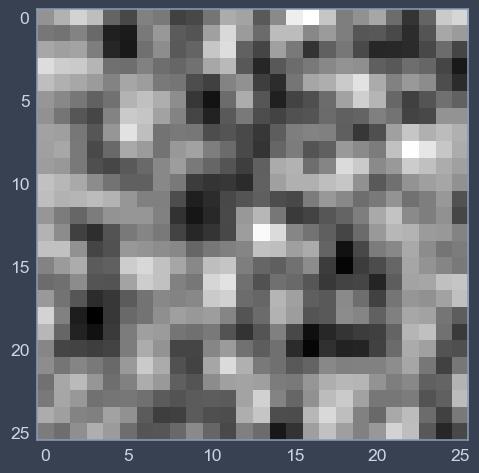

In [24]:
plt.imshow(tb_output, cmap = 'gray')

# Ground truth

In [11]:
kernel = np.array([[1,2,1],
          [2,4,2],
          [1,2,1]])
ground_truth = convolve2d(stim, kernel, mode='valid') // 16

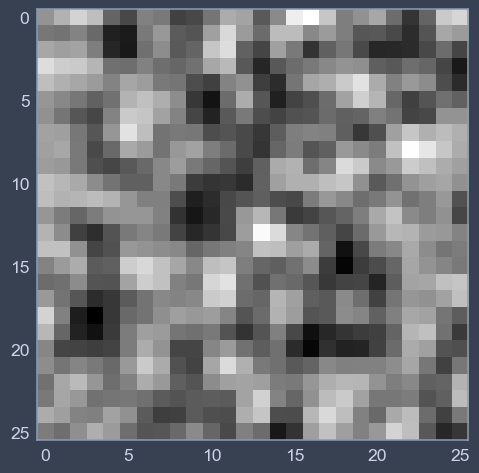

In [12]:
plt.imshow(ground_truth, cmap = 'gray')

# Verification

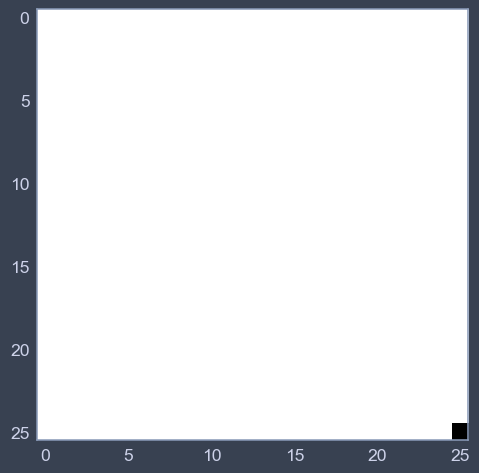

In [25]:
plt.imshow(ground_truth-tb_output, cmap = 'gray')

### Side-by-side comparison

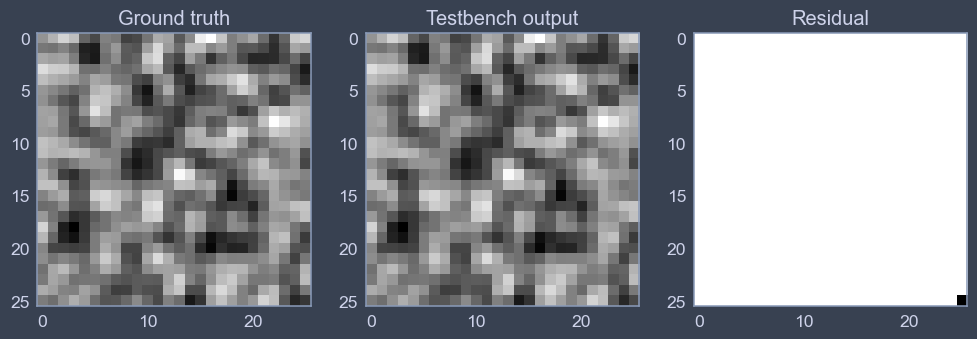

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,8))

ax1.imshow(ground_truth, cmap='gray')
ax1.set_title("Ground truth") 

ax2.imshow(tb_output, cmap='gray')
ax2.set_title("Testbench output")

ax3.imshow(ground_truth-tb_output, cmap='gray') 
ax3.set_title("Residual")

plt.show()

In [30]:
print(ground_truth)

[[141 158 178 165 113  97 130 126  93  97 123 155 150 107 135 193 203 170
  128 139 152 118  86 113 172 179]
 [124 122 131 116  74  71 125 143 108 104 148 181 145 117 164 164 134 145
  128 105 106  98  81 104 152 145]
 [152 147 150 128  77  70 120 137 107 113 170 183 112  95 148 125  85 111
  124  98  78  79  80  97 118  95]
 [183 174 172 160 120 119 130 119 114 121 152 162 106  77 106 118 125 134
  140 138 110 106 119 114  95  70]
 [165 157 152 145 131 151 146 126 123 100  92 131 139  91  81 123 151 156
  172 186 154 130 144 136 100  80]
 [142 134 124 112 121 159 166 156 137  87  66 118 155 105  74  94 101 118
  149 175 160 115  92 104 120 112]
 [139 123 105  96 131 172 169 149 131  95  75 107 126 100  94 102 104 117
  111 113 129 122  94  97 141 140]
 [149 147 124 105 142 186 165 122 125 124 100 104  98  87 109 128 131 129
  110  87 101 148 170 157 164 157]
 [148 152 126  98 116 153 145 122 143 149 128 117  98  86 114 127 104 111
  144 135 127 167 202 188 170 155]
 [146 143 125 101  

In [28]:
print(tb_output)

[[141 158 178 165 113  97 130 126  93  97 123 155 150 107 135 193 203 170
  128 139 152 118  86 113 172 179]
 [124 122 131 116  74  71 125 143 108 104 148 181 145 117 164 164 134 145
  128 105 106  98  81 104 152 145]
 [152 147 150 128  77  70 120 137 107 113 170 183 112  95 148 125  85 111
  124  98  78  79  80  97 118  95]
 [183 174 172 160 120 119 130 119 114 121 152 162 106  77 106 118 125 134
  140 138 110 106 119 114  95  70]
 [165 157 152 145 131 151 146 126 123 100  92 131 139  91  81 123 151 156
  172 186 154 130 144 136 100  80]
 [142 134 124 112 121 159 166 156 137  87  66 118 155 105  74  94 101 118
  149 175 160 115  92 104 120 112]
 [139 123 105  96 131 172 169 149 131  95  75 107 126 100  94 102 104 117
  111 113 129 122  94  97 141 140]
 [149 147 124 105 142 186 165 122 125 124 100 104  98  87 109 128 131 129
  110  87 101 148 170 157 164 157]
 [148 152 126  98 116 153 145 122 143 149 128 117  98  86 114 127 104 111
  144 135 127 167 202 188 170 155]
 [146 143 125 101  

In [29]:
print(stim)

[[ 79 132 196 201 222  48  69 127 188  50  46 137  72 194  69  75 245 233
  145 124 167 137 254  36 249 158 184  75]
 [153 191 164 235 227 164  75 174  71  32 145 104 143 218  25  90 248 235
  247  13 225 196  61  26  48 192 243 202]
 [ 48 131  21 133  34  51  28 161 243 134  86 130 253 161  93 249 200  10
  251  90  71  80 163 124  69 241 104  68]
 [220 118 179 116 190  16  17  76 156   3  97 173 233  66  26 213 142   1
   93 196  70  75  22  48  67 164  58 131]
 [177 224 206 230 219 112 150 200 141 158 146 188 252  34  29 179  15 143
  124  24 204  15 143 110  68 126  18  22]
 [ 62 239  94  48 205  37 221  75  14 145  55  44  75 247  46  21 219 238
  228 240 229 206 127 254 230  27 120  87]
 [154 109 171 245 104 103 194 217 251 165  78  46 107 231  84  70  71  25
   37 118 230 152  30  34  51 192  30 147]
 [117 201  38   2  26 131 141 165  44 228  19  98  84 202  72  37 151   1
  237  55  98 188 199  58   2 209 169 100]
 [222  76 200 253  76 217 231 222 135  46 187  11 129  20  79 19